In [1]:
import pandas as pd

df = pd.read_csv('codesonbytes.csv')

df.info() #get overview of data types, non-null values etc
df.describe() #summary stats for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<Axes: ylabel='Frequency'>

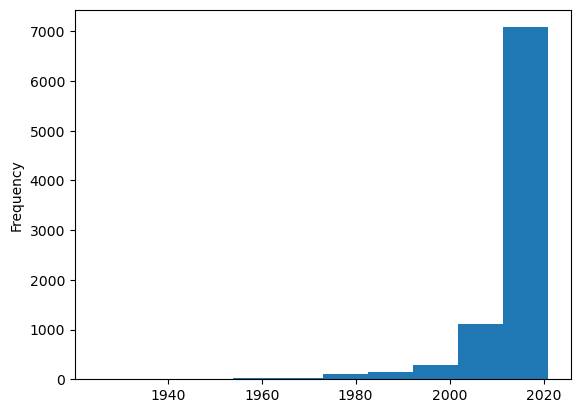

In [2]:
import matplotlib.pyplot as plt

#distribution of the release_year column
df['release_year'].plot.hist()

<Axes: xlabel='release_year', ylabel='count'>

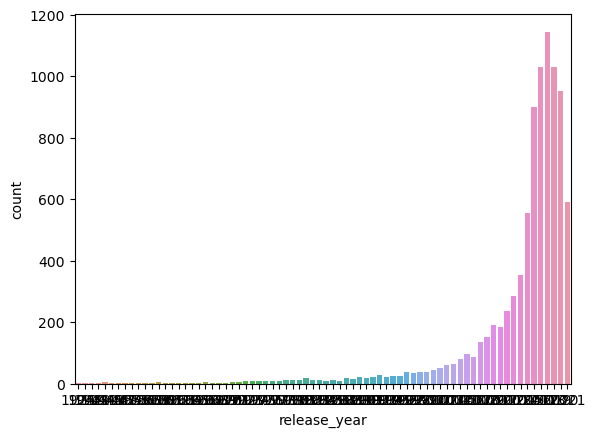

In [3]:
import seaborn as sns
#distribution of the release_year column using seaborn
sns.countplot(data=df, x='release_year')

(array([1173., 1697.,  973.,  894.,  497.,  397.,  272.,  104.,   56.,
          63.]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <BarContainer object of 10 artists>)

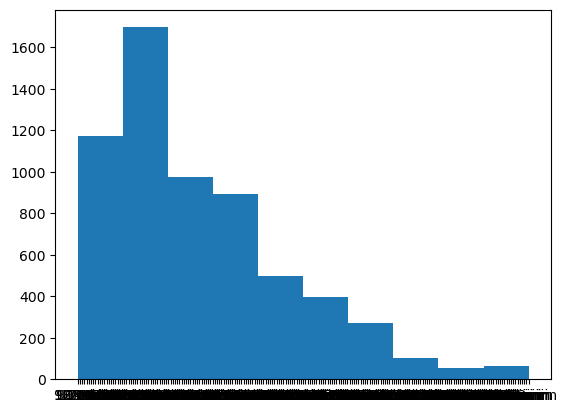

In [4]:
#visualizing movie lengths distribution by plotting a histogram of the duration column

df_movies = df[df['type']=='Movie']
plt.hist(df_movies['duration'])


<Axes: xlabel='release_year'>

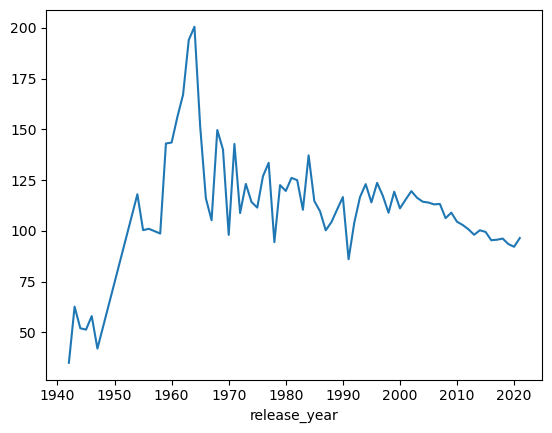

In [5]:
"""Plotting the average duration over time by year to see if movie lengths have
changed"""

import re

df['duration'] = df['duration'].apply(lambda x: int(re.search(r'\d+', x).group()) if isinstance(x, str) else x)

df_movies = df[df['type']=='Movie']
df_movies = df_movies[df_movies['duration'].apply(lambda x: isinstance(x, int))]

from datetime import timedelta

df['duration'] = df['duration'].apply(timedelta)

df_movies.groupby('release_year')['duration'].mean().plot()

<Axes: xlabel='rating'>

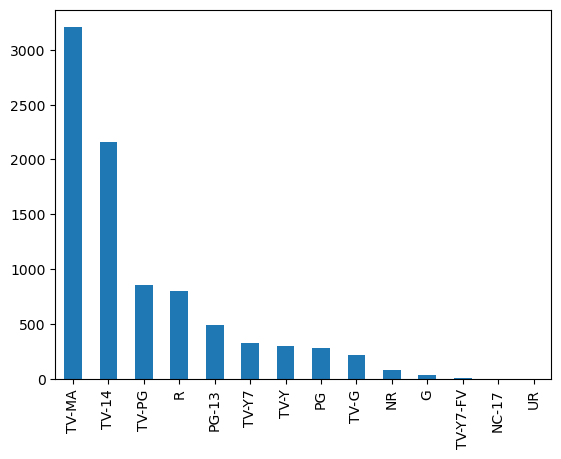

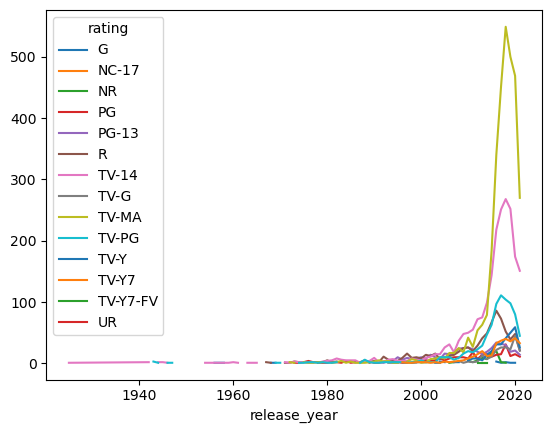

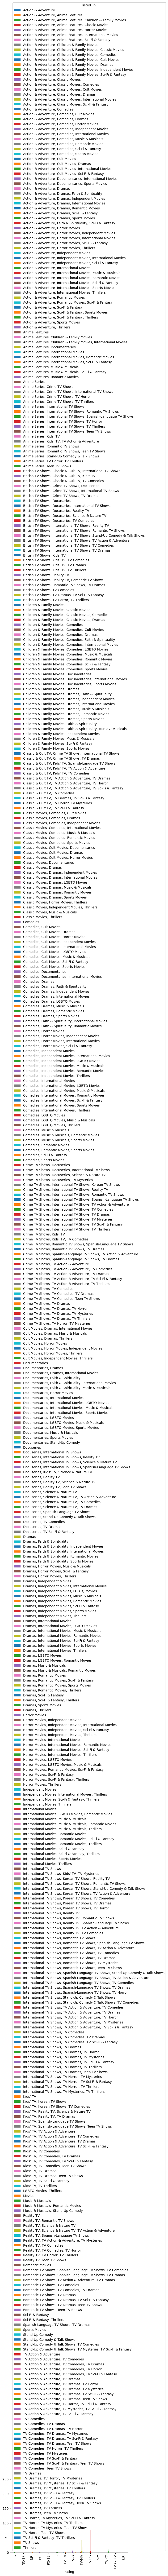

In [6]:
"""Analyzing ratings:
Count/plot the frequency of each rating (G, PG, etc)
Check if average ratings change over time
See if certain genres have higher/lower ratings on average"""

df['rating'].value_counts().plot(kind='bar')

df.groupby('release_year')['rating'].value_counts().unstack().plot()

df.groupby('listed_in')['rating'].value_counts().unstack(0).plot(kind='bar')


<Axes: xlabel='type'>

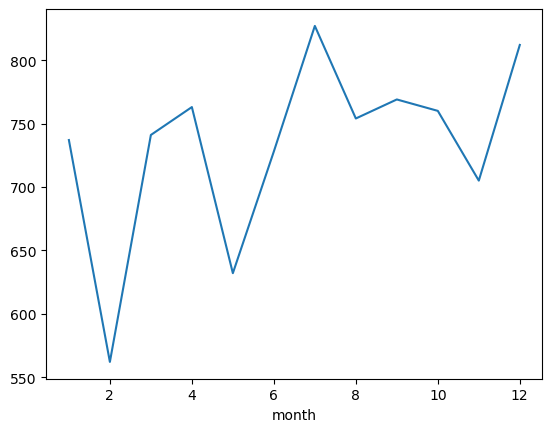

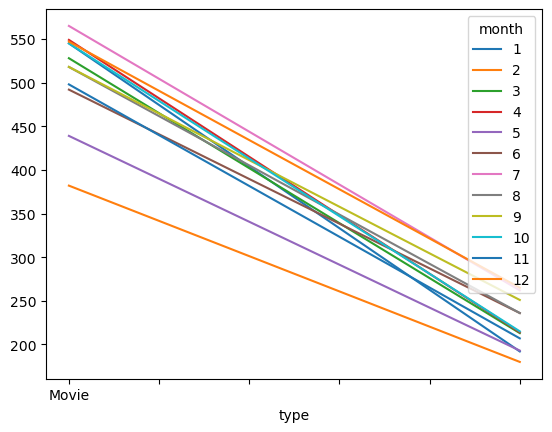

In [7]:
"""Analyzing release dates:
Plot release frequency by month/day of week to see seasonal trends
Compare release frequency for movies vs TV shows"""

df['release_date'] = pd.to_datetime(df['date_added'])
df['month'] = df['release_date'].dt.month

df.groupby('month')['title'].count().plot()

df.groupby([df['type'], df['month']])['title'].count().unstack().plot()